# Tutorial 8:  Artificial neural networks on crops dataset

**Week 2, Day 5: Climate Response: adaptation and impact**

**By Climatematch Academy**

__Content creators:__ Deepak Mewada, Grace Lindsay

__Content reviewers:__ Ohad Zivan, Name Surname

__Content editors:__ Name Surname, Name Surname

__Production editors:__ Name Surname, Name Surname

___
# **Tutorial Objectives**

*Estimated timing of tutorial: 10 minutes*

Welcome to tutorial 8 of a series focused on understanding the role of data science and machine learning in addressing the impact of climate change and adapting to it.

In this tutorial we will learn Artificial neural network. Specifically, by the end of this tutorial, you will be able to:

- 


---

In [ ]:
# @title Tutorial slides

# @markdown These are the slides for the videos in all tutorials today
from IPython.display import IFrame
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/kaq2x/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)



---
# **Setup**

In [14]:
#@title Import necessary libraries:

import numpy as np  # Import the numpy library as np - used for array computing and linear algebra operations
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier  # A type of artificial neural network
from sklearn.exceptions import ConvergenceWarning  # A warning message that may appear during model training
import warnings  # A module for managing warning messages

# Ignore the convergence warnings that may appear during model training
warnings.filterwarnings("ignore", category=ConvergenceWarning)

<details>
<summary> <font color='Red'>Click here if you are running on local machine or you encounter any error while importing   </font></summary>
**NOTE :**  Please note that if you are running this code on a local machine and encounter an error while importing a library, make sure to install the library via pip. For example, if you receive a "`ModuleNotFoundError: No module named 'library name'`" error , please run "`pip install 'library name'`" to install the required module.

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
#@title Plotting functions
#@markdown Run this cell to define plotting function we will be using in this code


--- 
# **Section 1: Artificial Neural Network on Crops Data**
---





In [ ]:
# @title Video 1: Video 1 Name
from ipywidgets import widgets
from IPython.display import display, IFrame, YouTubeVideo

out2 = widgets.Output()
with out2:
  class BiliVideo(IFrame):
    def __init__(self, id, page=1, width=400, height=300, **kwargs):
      self.id=id
      src = 'https://player.bilibili.com/player.html?bvid={0}&page={1}'.format(id, page)
      super(BiliVideo, self).__init__(src, width, height, **kwargs)

  video = BiliVideo(id="", width=854, height=480, fs=1)
  print(f'Video available at https://www.bilibili.com/video/{video.id}')
  display(video)

out1 = widgets.Output()
with out1:
  video = YouTubeVideo(id="", width=854, height=480, fs=1, rel=0)
  print(f'Video available at https://youtube.com/watch?v={video.id}')
  display(video)

out = widgets.Tab([out1, out2])
out.set_title(0, 'Youtube')
out.set_title(1, 'Bilibili')

display(out)

---
## Section 1.1:  Training an artificial neural network on crops data
---


As discussed before, there are usually multiple possible ways to solve a data science problem. Here we will train an artificial neural network (ANN) to perform binary classifcation on our remote sensing crops data set. 

We will first load our data.

In [3]:
#Load the data from the specified file path
data = np.load('/content/drive/Shareddrives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch Content Folder/W2D5 - Climate Response - Adaptation Impact /W2D5 Tutorials/togo_crops_data.npz')
Z#Extract the input and output features from the loaded data
X_train = data['arr_0']; y_train = data['arr_1']; X_test = data['arr_2']; y_test = data['arr_3']

Small artificial neural networks can be trained in scitkit-learn just like other models. Use [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) with default parameters to train a model on the crops training set and evaluate its accuracy on both the training and test sets. (MLP stands for multi-layer perceptron, another name for a simple artificial neural network). 

In [46]:
#################################################
## TODO for students: Import and fit MLP on crop data
# Fill in the code in empty places and comment out the line given below
raise NotImplementedError("Student exercise: Fill in the code in empty places to remove this error")
#################################################

# Import the MLPClassifier from the neural_network module in the sklearn library
from sklearn.neural_network import MLPClassifier

# Set a random seed to ensure reproducibility of results
np.random.seed(144)

# Fit the MLPClassifier model on the training data
trained_model = fit    # write code to fit MLPClassifier on train data

# Print the training accuracy and test accuracy of the model
print('Training Accuracy: ', trained_model.score(...,...))
print('Test Accuracy: ',  ...)

NotImplementedError: ignored



```
# After successfull implementation your result should look like this
 Training Accuracy:  0.7875968992248062
 Test Accuracy:      0.7189542483660131
```



In [6]:
#to_remove solution

# Import the MLPClassifier from the neural_network module in the sklearn library
from sklearn.neural_network import MLPClassifier

# Set a random seed to ensure reproducibility of results
np.random.seed(144)

# Fit the MLPClassifier model on the training data
trained_model = MLPClassifier().fit(X_train, y_train)

# Print the training accuracy and test accuracy of the model
print(' Training Accuracy: ',  trained_model.score(X_train,y_train))
print(' Test Accuracy:     ',  trained_model.score(X_test,y_test))

 Training Accuracy:  0.7875968992248062
 Test Accuracy:      0.7189542483660131


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Think! 1.1: Understanding the model
Does the ANN perform better or worse than the logistic regression model? Does the result surprise you?



---


## Section 1.2:  Overfitting in ANNs


---


Our ANN model has better training performance but worse test performance than the linear regression model. As we saw previously, high training data performance but poor test data performance could be a sign of overfitting. Overfitting happens when a model has too many free parameters, which it uses to 'memorize' the relationships between inputs and outputs in the training set. In this way, what the model learns is too specific to the training data and won't be helpful on new data. 

One way to cause overfitting is to use a large model. Use the hidden_layer_sizes parameter of MLPClassifier to vary the number of units in the hidden layer in your ANN. Plot the training and test performance as a function of the number of hidden units. Note how training performance rises as test performance does not.  


### Exercise 1.2 : Visualizing the Impact of Hidden Units on the Performance of a Multi-Layer Perceptron Classifier

**Objective**: In this exercise, you are required to fill in the missing code in the mlp_performance function. The function is supposed to train multiple MLP classifiers with different numbers of hidden units and return the training and testing accuracy for each classifier.

It may take a few minutes for this to run. While you wait, discuss what adding more units really means. What does each hidden unit do and how does having more give the model higher capacity? 


In [26]:
#@markdown  *Execute this cell to enable the plotting function to be used for plotting performance of our model in next cell: `plot_mlp_performance`*

def plot_mlp_performance(hidden_units, train_accuracy, test_accuracy):
    """
    Plot the performance of the Multi-Layer Perceptron (MLP) model with varying hidden units.
    
    Args:
    hidden_units (range): A range of integers representing the different number of hidden units.
    train_accuracy (list): A list of floats representing the training accuracy for each number of hidden units.
    test_accuracy (list): A list of floats representing the testing accuracy for each number of hidden units.
    
    Returns:
    None
    """
    
    # Create a figure and axis object with specified size
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the training accuracy as a function of number of hidden units
    ax.plot(hidden_units, train_accuracy, marker='o', label='Training Accuracy', color='navy', alpha=0.8, linewidth=2)
    
    # Plot the testing accuracy as a function of number of hidden units
    ax.plot(hidden_units, test_accuracy, marker='o', label='Testing Accuracy', color='crimson', alpha=0.8, linewidth=2)
    
    # Add a legend to the plot
    ax.legend()
    
    # Add a title to the plot
    ax.set_title('Performance of MLP with Varying Hidden Units', fontsize=16, fontweight='bold')
    
    # Add x-label to the plot
    ax.set_xlabel('Number of Hidden Units', fontsize=14)
    
    # Add y-label to the plot
    ax.set_ylabel('Accuracy', fontsize=14)
    
    # Set tick labels for x and y axes
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Add gridlines to the plot
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Remove top and right spines of the plot
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Adjust the layout of the plot
    plt.tight_layout()
    
    # Display the plot
    plt.show()


In [28]:
def mlp_performance(X_train, y_train, X_test, y_test):
    """
    This function trains multiple MLP classifiers with different numbers of hidden units and returns the training and testing
    accuracy for each classifier.
    
    Args:
    X_train (ndarray): An array of shape (N_train, M) that contains the training data
    y_train (ndarray): An array of shape (N_train,) that contains the labels for the training data
    X_test (ndarray): An array of shape (N_test, M) that contains the testing data
    y_test (ndarray): An array of shape (N_test,) that contains the labels for the testing data
    
    Returns:
    tuple: A tuple of three arrays: hidden_units, train_accuracy, and test_accuracy
    """

    #################################################
    ## TODO for students: 
    # Fill in the code in empty places to remove this error
    raise NotImplementedError("Student exercise: Fill in the code in empty places to remove this error")
    #################################################
    
    # Define the range of hidden units to test
    hidden_units = range(5, 300, 15)  # Test 5 to 300 hidden units in steps of 15

    # Create empty lists to store training and testing accuracy for different numbers of hidden units
    train_accuracy = []
    test_accuracy = []

    # Loop over different numbers of hidden units
    for units in hidden_units:
        # Set a seed for random number generation to ensure consistent results
        np.random.seed(144)

        # Create an MLP classifier with the current number of hidden units
        classifier = MLPClassifier(hidden_layer_sizes=(...))

        # Train the classifier on the training data
        classifier.fit(..., y_train)

        # Calculate the training and testing accuracy of the classifier
        train_acc = classifier.score(..., ...)
        test_acc = classifier.score(..., ...)

        # Add the training and testing accuracy to the corresponding lists
        train_accuracy.append(...)
        test_accuracy.append(...)

    return hidden_units, train_accuracy, test_accuracy

## Uncomment the code below to test your function
#Call mlp_performance function
#hidden_units, train_accuracy, test_accuracy = mlp_performance(X_train, y_train, X_test, y_test)
# Plot the training and testing accuracy as a function of the number of hidden units
#plot_mlp_performance(hidden_units, train_accuracy, test_accuracy)    



```
# Correct implementation should result in plot like this
```
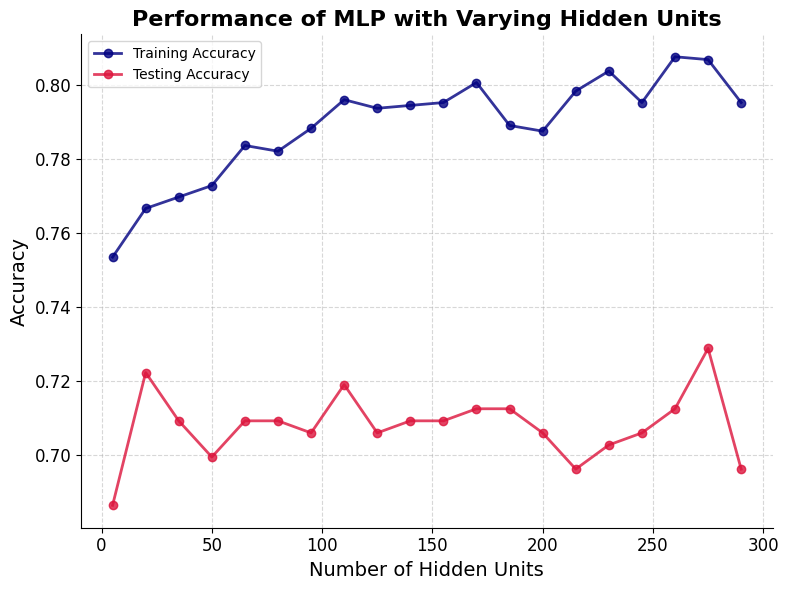



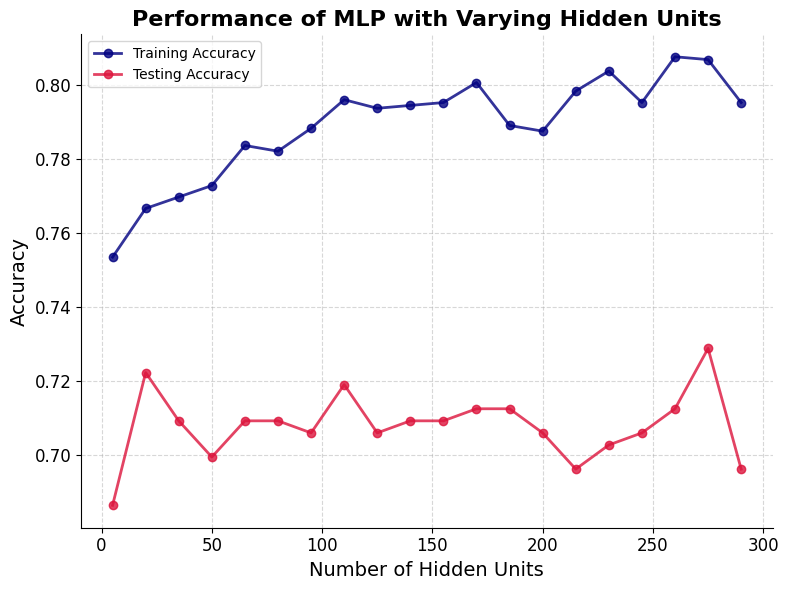

In [44]:
def mlp_performance(X_train, y_train, X_test, y_test):
    """
    This function trains multiple MLP classifiers with different numbers of hidden units and returns the training and testing
    accuracy for each classifier.
    
    Args:
    X_train (ndarray): An array of shape (N_train, M) that contains the training data
    y_train (ndarray): An array of shape (N_train,) that contains the labels for the training data
    X_test (ndarray): An array of shape (N_test, M) that contains the testing data
    y_test (ndarray): An array of shape (N_test,) that contains the labels for the testing data
    
    Returns:
    tuple: A tuple of three arrays: hidden_units, train_accuracy, and test_accuracy
    """

    
    # Define the range of hidden units to test
    hidden_units = range(5, 300, 15)  # Test 5 to 300 hidden units in steps of 15

    # Create empty lists to store training and testing accuracy for different numbers of hidden units
    train_accuracy = []
    test_accuracy = []

    # Loop over different numbers of hidden units
    for units in hidden_units:
        # Set a seed for random number generation to ensure consistent results
        np.random.seed(144)

        # Create an MLP classifier with the current number of hidden units
        classifier = MLPClassifier(hidden_layer_sizes=(units))

        # Train the classifier on the training data
        classifier.fit(X_train, y_train)

        # Calculate the training and testing accuracy of the classifier
        train_acc = classifier.score(X_train, y_train)
        test_acc = classifier.score(X_test, y_test)

        # Add the training and testing accuracy to the corresponding lists
        train_accuracy.append(train_acc)
        test_accuracy.append(test_acc)

    return hidden_units, train_accuracy, test_accuracy

## Uncomment the code below to test your function
#Call mlp_performance function
hidden_units, train_accuracy, test_accuracy = mlp_performance(X_train, y_train, X_test, y_test)
# Plot the training and testing accuracy as a function of the number of hidden units
plot_mlp_performance(hidden_units, train_accuracy, test_accuracy)  

How do you interpret the plot above? What do you observe?

<details>
<summary> <font color='yellow'>Hint  </font></summary>
The plot generated by the mlp_performance function shows the training and testing accuracy of a multi-layer perceptron classifier (MLP) as a function of the number of hidden units. The blue line shows the training accuracy, while the orange line shows the testing accuracy.       
As the number of hidden units increases, the training accuracy generally increases as well. However, the testing accuracy may not necessarily increase and may start to plateau or even decrease at some point. This indicates the model is overfitting, where it is learning the noise in the training data instead of the underlying pattern.



---




## Section 1.3:  Overfitting by learning too much

As the network is trained, it loops through all the training data repeatedly, updating its weights to make the network perform better on that data. Another way to induce overfitting is to let the network loop over the training data too many times. Repeat the above training experiment with the default number of hidden units but varying the number training epochs using the max_iter parameter. 

While you wait for this to run, you can continue your discussion about hidden units. 

### Exercise 1.3 : Training MLPClassifier with varying number of epochs and observing performance

In [39]:
#@markdown  *Execute this cell to enable the plotting function to be used for plotting performance of our model in next cell: `plot_training_performance`*


def plot_training_performance(train_perfs, test_perfs):
    """
    Plots the training and test performance against the number of training epochs.
    
    Args:
    train_perfs: list of floats representing the training performance for each epoch.
    test_perfs: list of floats representing the test performance for each epoch.
    """
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the training and test performance against the number of training epochs
    ax.plot(np.arange(5,500,20),train_perfs, label='Training Accuracy', linewidth=2, marker='o')
    ax.plot(np.arange(5,500,20),test_perfs, label='Test Accuracy', linewidth=2, marker='s')
    ax.set_title('Training and Test Performance vs. Number of Training Epochs', fontsize=16, fontweight='bold')
    ax.set_xlabel('Number of Training Epochs', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.legend(loc='lower right', fontsize=12)
    ax.grid(True)

    # Add text annotation for maximum test accuracy
    max_test_acc = max(test_perfs)
    max_test_epoch = (np.argmax(test_perfs)*20)+5
    ax.annotate(f'Maximum test accuracy of {max_test_acc:.2f} at {max_test_epoch} epochs', 
                xy=(max_test_epoch, max_test_acc), 
                xytext=(max_test_epoch+50, max_test_acc-0.05),
                fontsize=12, fontweight='bold', color='green',
                arrowprops=dict(facecolor='green', shrink=0.05))

    # Show the plot
    plt.tight_layout()
    plt.show()


In [43]:
def train_epochs(X_train, y_train, X_test, y_test, start_epoch=5, end_epoch=500, step=20):
    """
    Train an MLPClassifier for a range of epochs and return the training and test accuracy for each epoch.

    Parameters:
    -----------
    X_train: array-like of shape (n_samples, n_features)
        Training input samples.
    y_train: array-like of shape (n_samples,)
        Target values for the training set.
    X_test: array-like of shape (n_samples, n_features)
        Test input samples.
    y_test: array-like of shape (n_samples,)
        Target values for the test set.
    start_epoch: int, optional
        The first epoch to train for. Default is 5.
    end_epoch: int, optional
        The last epoch to train for. Default is 500.
    step: int, optional
        The step size between epochs. Default is 20.

    Returns:
    --------
    tuple
        Two lists, the first containing the training accuracy for each epoch, and the second containing the test 
        accuracy for each epoch.
    """

    #################################################
    ## TODO for students: 
    # Fill in the code in empty places and then comment out the line given below
    raise NotImplementedError("Student exercise: Fill in the code in empty places to remove this error")
    #################################################

    # Initialize empty lists to store training and test performance
    train_accuracy = []
    test_accuracy = []

    # Loop through a range of epochs and train the MLPClassifier model for each epoch
    for m in range(start_epoch, end_epoch, step):
        # Set random seed for reproducibility
        np.random.seed(144)

        # Fit the MLPClassifier model to the training data for the current epoch
        trained_model = MLPClassifier(max_iter=m).fit(X_train, y_train)

        # Calculate and store the training and test accuracy for the current epoch
        train_accuracy.append(trained_model.score(X_train,y_train))
        test_accuracy.append(trained_model.score(X_test,y_test))

    # Return the lists of training and test performance for each epoch
    return train_accuracy, test_accuracy

## Uncomment the code below to test your function
#train_perfs, test_perfs = train_epochs(X_train, y_train, X_test, y_test) # Call the train_epochs function and store the returned values in variables train_perfs and test_perfs
#plot_training_performance(train_perfs, test_perfs) # Calling plotting function to plot the performance vs epochs plot



```
# Example Output
```
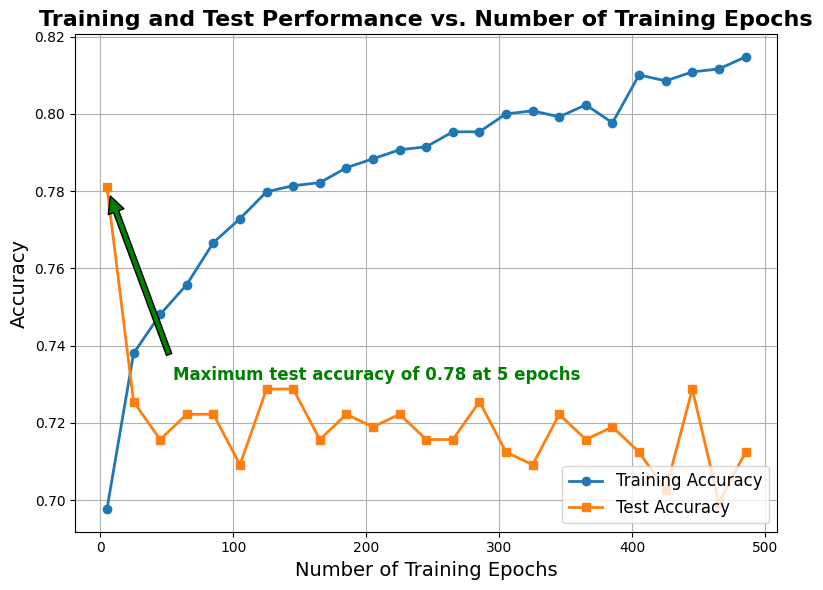


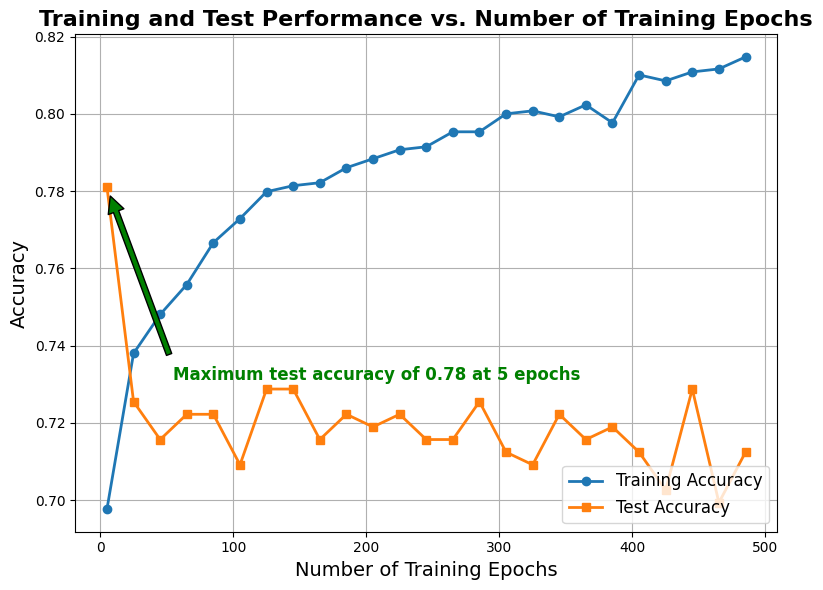

In [41]:
#to_remove

def train_epochs(X_train, y_train, X_test, y_test, start_epoch=5, end_epoch=500, step=20):
    """
    Train an MLPClassifier for a range of epochs and return the training and test accuracy for each epoch.

    Parameters:
    -----------
    X_train: array-like of shape (n_samples, n_features)
        Training input samples.
    y_train: array-like of shape (n_samples,)
        Target values for the training set.
    X_test: array-like of shape (n_samples, n_features)
        Test input samples.
    y_test: array-like of shape (n_samples,)
        Target values for the test set.
    start_epoch: int, optional
        The first epoch to train for. Default is 5.
    end_epoch: int, optional
        The last epoch to train for. Default is 500.
    step: int, optional
        The step size between epochs. Default is 20.

    Returns:
    --------
    tuple
        Two lists, the first containing the training accuracy for each epoch, and the second containing the test 
        accuracy for each epoch.
    """

    # Initialize empty lists to store training and test performance
    train_accuracy = []
    test_accuracy = []

    # Loop through a range of epochs and train the MLPClassifier model for each epoch
    for m in range(start_epoch, end_epoch, step):
        # Set random seed for reproducibility
        np.random.seed(144)

        # Fit the MLPClassifier model to the training data for the current epoch
        trained_model = MLPClassifier(max_iter=m).fit(X_train, y_train)

        # Calculate and store the training and test accuracy for the current epoch
        train_accuracy.append(trained_model.score(X_train,y_train))
        test_accuracy.append(trained_model.score(X_test,y_test))

    # Return the lists of training and test performance for each epoch
    return train_accuracy, test_accuracy

## Uncomment the code below to test your function
# Call the train_epochs function and store the returned values in variables train_perfs and test_perfs
train_perfs, test_perfs = train_epochs(X_train, y_train, X_test, y_test)
# Calling plotting function to plot the performance vs epochs plot
plot_training_performance(train_perfs, test_perfs)

What did you observe?

<details>
<summary> <font color='yellow'>Hint  </font></summary>
The plot generated shows the training and test accuracy of a neural network as the number of training epochs increases. The training accuracy generally increases with the number of epochs, while the test accuracy initially increases but eventually levels off or even decreases due to overfitting. The maximum test accuracy achieved and the epoch at which it occurs can also be seen on the plot.



---
## Section 2.3 : Reflection on Overfitting
---



### Think! 2.1: Preventing overfitting

Now that we saw what can cause overfitting, reflect on how to prevent it. In addition to controlling the number of hidden units and amount of training, are there any other ways to prevent overfitting? 



```
#  to_remove explanation

Solutions to handle overfitting include reducing model complexity, increasing dataset size, using regularization, or cross-validation. Ensemble models such as random forests also do inherently help control overfitting by averaging many different models
```





---


# **Summary**

Estimated timing of tutorial: 

In this tutorial, we explored how to train an Artificial Neural Network on the crops dataset. We also learned about overfitting in ANNs and how to prevent it. By experimenting with different numbers of hidden units and epochs, we observed how overfitting can occur due to the model learning too much from the training data. Overall, this tutorial provided a comprehensive introduction to training ANNs on real-world datasets and highlighted the importance of preventing overfitting.

---

